In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd

Below is an example of a dataset designed for linear regression. The input variable is generated randomly and the target variable is generated as a linear combination of that input variable plus an error term.

/Users/marcomarino/Documents/GitHub/ml-basics/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marcomarino/Documents/GitHub/ml-basics/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


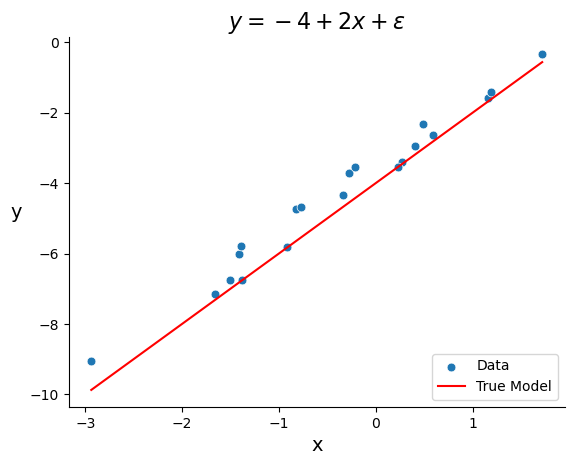

In [72]:
# generate data
np.random.seed(122)
N = 20
beta0 = -4
beta1 = 2
# take random N values from the gaussian distribution
x = np.random.randn(N)
e = np.random.rand(N)
y = beta0 + beta1 * x + e
# generate 100 
true_x = np.linspace(min(x), max(x), 100)
true_y = beta0 + beta1 * true_x

# plot
fig, ax = plt.subplots()
sns.scatterplot(x=x, y=y, s = 40, label = 'Data')
sns.lineplot(x=true_x, y=true_y, color = 'red', label = 'True Model')
ax.set_xlabel('x', fontsize = 14)
ax.set_title(fr"$y = {beta0} + ${beta1}$x + \epsilon$", fontsize = 16)
ax.set_ylabel('y', fontsize=14, rotation=0, labelpad=10)
ax.legend(loc = 4)
sns.despine()

... once we have estimated beta values, we can plot our estimation model (see the approach 1: minimizing the loss)...

/Users/marcomarino/Documents/GitHub/ml-basics/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marcomarino/Documents/GitHub/ml-basics/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marcomarino/Documents/GitHub/ml-basics/.conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marcomarino/Documents/GitHub/ml-basics/.conda/lib/python3.11/site-packages/sea

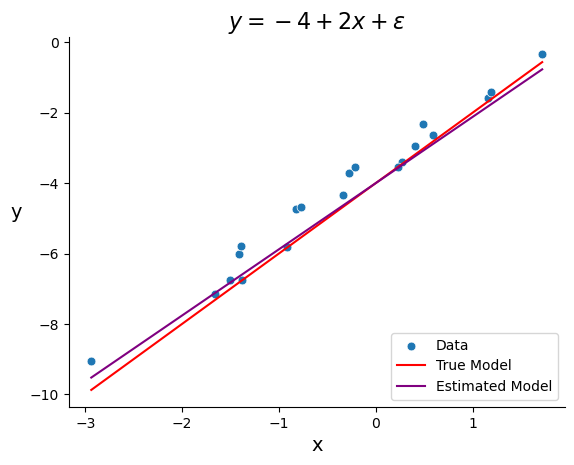

In [73]:
# generate data
np.random.seed(122)
N = 20
beta0 = -4
beta1 = 2
# take random N values from the gaussian distribution
x = np.random.randn(N)
e = np.random.rand(N)
y = beta0 + beta1 * x + e
# generate 100 
true_x = np.linspace(min(x), max(x), 100)
true_y = beta0 + beta1 * true_x

# estimate model (minimizing the loss approach)
beta1_hat = sum((x - np.mean(x)) * (y - np.mean(y))) / sum((x - np.mean(x))**2)
beta0_hat = np.mean(y) - beta1_hat * np.mean(x)
fit_y = beta0 + beta1_hat * true_x

# plot
fig, ax = plt.subplots()
sns.scatterplot(x=x, y=y, s = 40, label = 'Data')
sns.lineplot(x=true_x, y=true_y, color = 'red', label = 'True Model')
sns.lineplot(x=true_x, y=fit_y, color = 'purple', label = 'Estimated Model')
ax.set_xlabel('x', fontsize = 14)
ax.set_title(fr"$y = {beta0} + ${beta1}$x + \epsilon$", fontsize = 16)
ax.set_ylabel('y', fontsize=14, rotation=0, labelpad=10)
ax.legend(loc = 4)
sns.despine()

## Constructing the linear regression model with numpy

In [74]:
housing = datasets.fetch_california_housing(as_frame=True)
housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


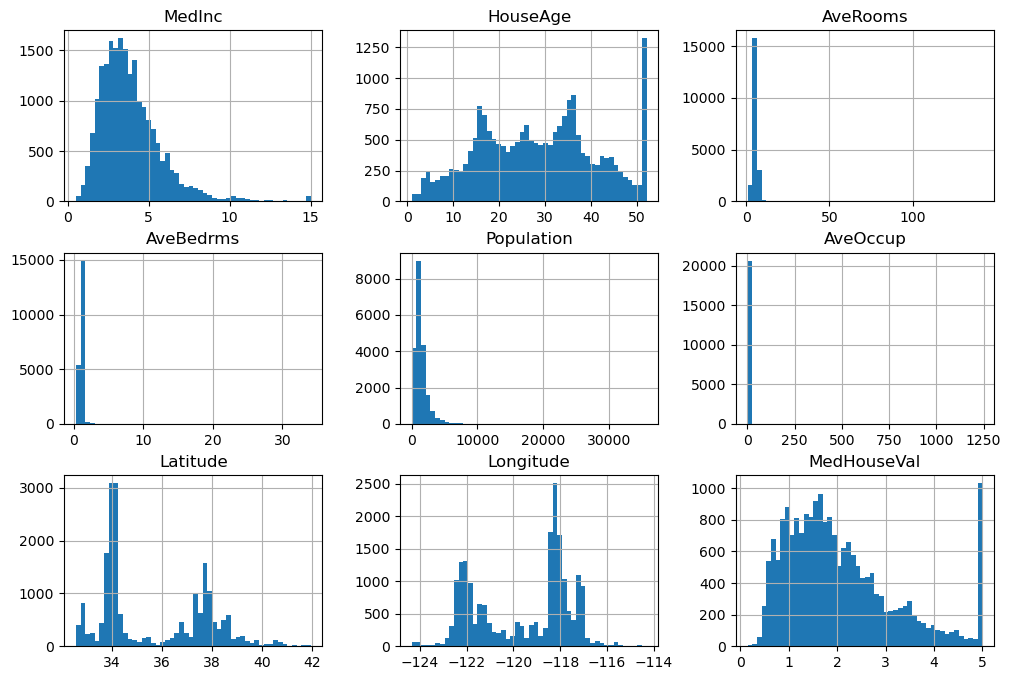

In [75]:
housing.frame.hist(bins=50, figsize=(12, 8))
plt.show()

from the above histograms, we can see that:
1. features are distributed on very different scales
2. In HouseAge and HouseValue columns, the values are capped at 50 and 5 respectively

Now we can plot the housing value with respect to latitudes and longitudes (based on location)

<Axes: xlabel='Longitude', ylabel='Latitude'>

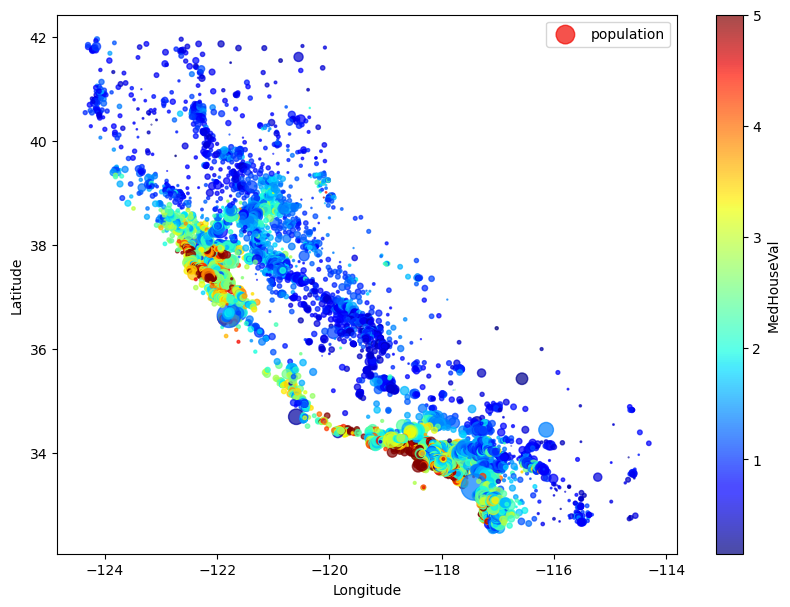

In [76]:
housing.frame.plot(kind="scatter", x="Longitude", y="Latitude", c="MedHouseVal",
             cmap="jet", colorbar=True, legend=True, sharex=False,
             figsize=(10,7), s=housing.frame['Population']/100,
             label="population", alpha=0.7)

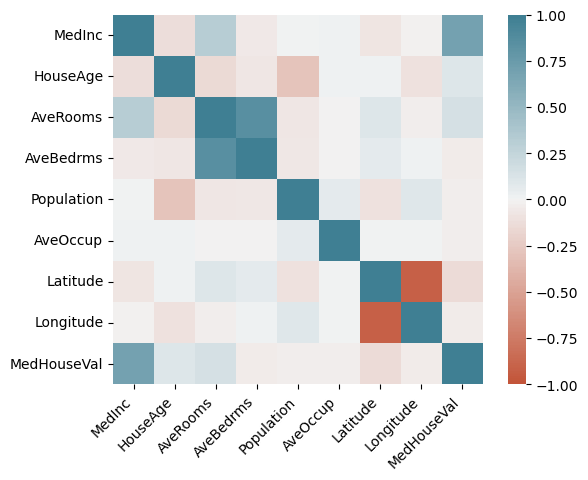

In [77]:
corr = housing.frame.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

The above plot shows a strong linear correlation between the Median Income and House Value (expected that the higher is the income the higher is the house value because someone rich can afford the higher house value). Let's explore further the correlation:

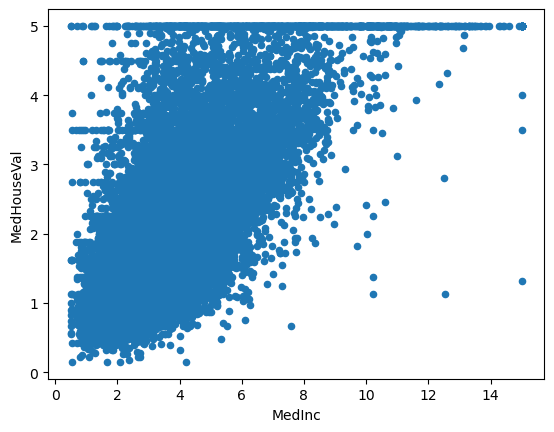

In [78]:
housing.frame.plot(kind="scatter", x="MedInc", y="MedHouseVal")
plt.show()

here's another plot showing a strong linear correlation between the Median Income and the House Value, but we can also see some instances in the data that are capped and they form lines. This can create problems and they should be preprocessed.

Let's build the `LinearRegression` class:
1. estimating the parameters of the linear regression:<br>
𝜷̂ = (𝐗⊤ 𝐗)^−1 𝐗⊤𝐲

2. make the in-sample predictions:<br>
𝐲̂ =𝐗𝜷̂

3. compute the loss:<br>
![](imgs/rss.png)

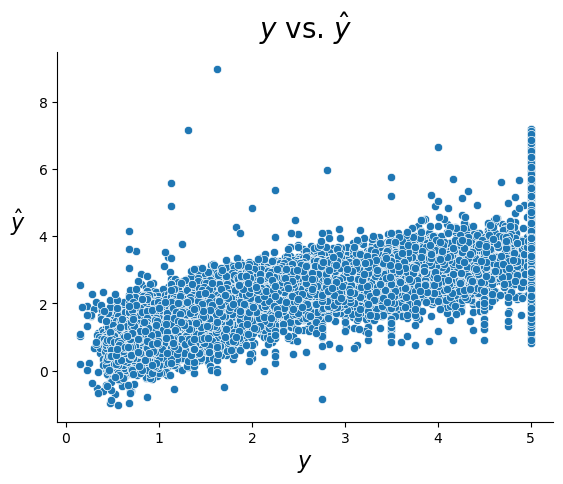

In [80]:
class CustomLinearRegression:

    # it estimates the beta_hats parameters (training)
    def fit(self, X, y, intercept = False):

        # record data and dimensions
        if intercept == False:
            # add intercept if not included
            ones = np.ones(len(X)).reshape(len(X), 1) 
            # add column of ones in first column
            X = np.concatenate((ones, X), axis = 1)
        self.X = np.array(X)
        self.y = np.array(y)
        self.N, self.D = self.X.shape

        # estimate parameters
        XtX = np.dot(self.X.T, self.X)
        XtX_inverse = np.linalg.inv(XtX)
        Xty = np.dot(self.X.T, self.y)
        self.beta_hats = np.dot(XtX_inverse, Xty)

        # make the in-sample prediction
        self.y_hat = np.dot(self.X, self.beta_hats)

        # compute the loss
        self.Loss = .5 * np.sum((self.y - self.y_hat)**2)

    # given a test set of predictors X_test it forms y_test_hat
    # it is used to test how fit funciton performed and our 
    # capacity to predict (test)
    def predict(self, X_test, intercept = True):
        # form predictions after we have computed the beta_hats
        # from the fit function
        self.y_test_hat = np.dot(X_test, self.beta_hats)

X = housing['data']
# the target variable is median neighborhood home value 
y = housing['target']

model = CustomLinearRegression()
model.fit(X, y, intercept=False)

# let's plot to see how our model predicted the result
fig, ax = plt.subplots()
sns.scatterplot(x=model.y, y=model.y_hat)
ax.set_xlabel(r'$y$', size = 16)
ax.set_ylabel(r'$\hat{y}$', rotation = 0, size = 16, labelpad = 15)
ax.set_title(r'$y$ vs. $\hat{y}$', size = 20, pad = 10)
sns.despine()
